In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
data = pd.read_csv('HIGGS_100k.csv', header = None)

# Visualizar as primeiras linhas do dataset
print(data.head())

print(data.info())

    0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26       

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separar os rótulos (primeira coluna) e os dados (restantes)
X = data.iloc[:, 1:22].values  # Usar apenas as 21 low-level features
y = data.iloc[:, 0].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [75]:
def fuc(X_train, X_val,  y_train, y_val, epoch = 10, batch = 100):
    active = ['relu', 'sigmoid', 'tanh', 'relu6', 'elu', 'softmax'] 
    dense = [256, 128, 64, 32, 1]
    camadas = [None]*len(dense)
    for l in range(0, 1):
        for k in range(0, len(dense)):
            model = Sequential()
            atual = 0
            for i, element in enumerate(active):
                for j in range(0, len(dense)):
                    if j == k:
                        model.add(Dense(dense[j] ,activation=element))
                    elif camadas[j] != None:
                        model.add(Dense(dense[j] ,activation=camadas[j]))
                    else:
                        model.add(Dense(dense[j] ,activation='relu'))
                
                optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
                model.compile(optimizer= optimizer, loss = "MSE" , metrics=['accuracy'])

                # Treinar o modelo
                treino = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, batch_size = batch)

                if np.max(treino.history['val_accuracy']) > atual: 
                    camadas[k] = element
                    atual = np.max(treino.history['val_accuracy'])

    return print(camadas)

In [76]:
fuc(X_train, X_val,  y_train, y_val, epoch = 100, batch = 200)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5338 - loss: 0.2508 - val_accuracy: 0.5726 - val_loss: 0.2411
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5853 - loss: 0.2377 - val_accuracy: 0.6036 - val_loss: 0.2342
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6007 - loss: 0.2333 - val_accuracy: 0.6016 - val_loss: 0.2327
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6074 - loss: 0.2312 - val_accuracy: 0.5994 - val_loss: 0.2340
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6191 - loss: 0.2279 - val_accuracy: 0.6164 - val_loss: 0.2284
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6272 - loss: 0.2248 - val_accuracy: 0.6188 - val_loss: 0.2275
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6338 - loss: 0.2232 - val_accuracy: 0.6186 - val_loss: 0.2274
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6375 - loss: 0.2216 - val_accu

C:\Users\Gustavo\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (200, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5246 - loss: 0.4754 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5311 - loss: 0.4689 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5293 - loss: 0.4707 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5272 - loss: 0.4728 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5282 - loss: 0.4718 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5286 - loss: 0.4714 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5286 - loss: 0.4714 - val_accuracy: 0.5286 - val_loss: 0.4714
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5292 - loss: 0.4708 - val_accuracy: 0.5286

In [41]:
print(fuc(X_train, X_val,  y_train, y_val, epoch = 10, batch = 100, camada = 0))

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.5428 - loss: 0.2470 - val_accuracy: 0.5793 - val_loss: 0.2408
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.5788 - loss: 0.2399 - val_accuracy: 0.5966 - val_loss: 0.2364
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.5915 - loss: 0.2367 - val_accuracy: 0.6025 - val_loss: 0.2345
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.6004 - loss: 0.2342 - val_accuracy: 0.6087 - val_loss: 0.2330
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.6028 - loss: 0.2330 - val_accuracy: 0.6020 - val_loss: 0.2344
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.6092 - loss: 0.2310 - val_accuracy: 0.6017 - val_loss: 0.2343
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.6117 - loss: 0.2308 - val_accuracy: 0.6160 - val_loss: 0.2303
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.6169 - loss: 0.2285 - 

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir a estrutura da rede neural
model = Sequential()
model.add(Dense(512,activation='relu'))#, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.45))
model.add(Dense(256,activation='relu'))#, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.45))
model.add(Dense(128,activation='relu'))#, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.45))
model.add(Dense(64,activation='softmax'))#, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.45))
model.add(Dense(32, activation='elu'))#, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.45))
model.add(Dense(16, activation='elu'))#, kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))


In [100]:
from tensorflow.keras.metrics import F1Score
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer= optimizer, loss = "MSE" , metrics=['accuracy', F1Score(average=None, threshold=None, name="f1_score", dtype=None)])

# Treinar o modelo
treino = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size = 100)


Epoch 1/50


ValueError: FBetaScore expects 2D inputs with shape (batch_size, output_dim). Received input shapes: y_pred.shape=(100, 1) and y_true.shape=(100,).

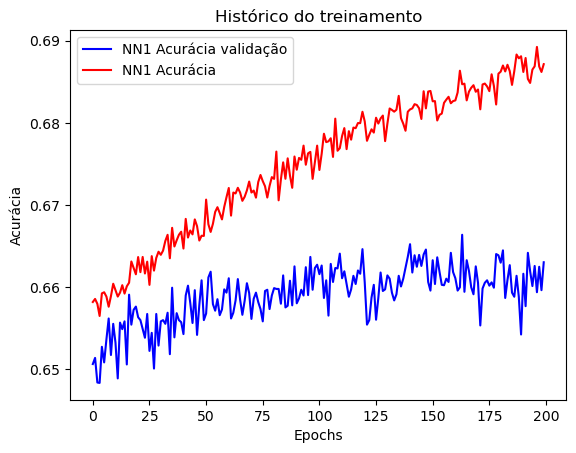

In [84]:
plt.plot(treino.history['val_accuracy'], color='b', label="NN1 Acurácia validação")
plt.plot(treino.history['accuracy'], color='r', label="NN1 Acurácia")
plt.title("Histórico do treinamento")
plt.xlabel("Epochs")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

In [95]:

from sklearn.metrics import f1_score
y_pred = model.predict(X_val)
y_pred = (y_pred >= 0.5).astype(int)
f1 = f1_score(y_val, y_pred)
print(f'F1 Score: {f1}')

626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step
F1 Score: 0.6896819910127895


In [82]:
m_wwbb_signal = data.loc[y_pred[:, 0] == 1].iloc[:, -1]
m_wwbb_background = data.loc[y_pred[:, 0] == 0].iloc[:, -1]

# Histograma para o espectro de massa m_wwbb
plt.hist(m_wwbb_signal, bins=50, alpha=0.5, label='Signal')
plt.hist(m_wwbb_background, bins=50, alpha=0.5, label='Background')
plt.xlabel('m_wwbb')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Para os valores originalmente rotulados, você precisará de uma abordagem diferente
# Se 'class' era uma coluna no dataframe original, você precisará ajustar isso também
# Aqui está um exemplo se 'class' fosse a penúltima coluna

m_wwbb_signal_original = data.loc[data.iloc[:, -2] == 1].iloc[:, -1]
m_wwbb_background_original = data.loc[data.iloc[:, -2] == 0].iloc[:, -1]

plt.hist(m_wwbb_signal_original, bins=50, alpha=0.5, label='Original Signal')
plt.hist(m_wwbb_background_original, bins=50, alpha=0.5, label='Original Background')
plt.xlabel('m_wwbb')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

NameError: name 'y_pred' is not defined